In [1]:
import jyrobot
import math
from IPython.display import display, clear_output
from PIL import Image

In [2]:
world = jyrobot.load("two-scribblers-no-walls")

In [3]:
world.watch("panel")

In [4]:
world.reset()
world.robots[0].va = 0
world.robots[0].vx = 2
world.robots[0].x = 450
world.robots[1].va = math.pi/10
world.draw()

In [5]:
def control(world):
    pic = world.robots[0].cameras[0].takePicture()
    clear_output(wait=True)
    display(pic)
    world.step()
    if world.robots[0].stalled:
        world.robots[0].vx = -world.robots[0].vx

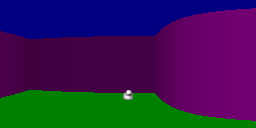

In [6]:
world.run(control)